# Creating a Linear Cellular Automaton

Let's start creating a linear cellular automaton

 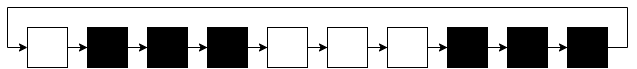

A cellular automaton is a discrete model of computation studied in automata theory. 

It consists of a regular grid of cells, each in one of a finite number of states, such as on and off (in contrast to a coupled map lattice). The grid can be in any finite number of dimensions. For each cell, a set of cells called its neighborhood is defined relative to the specified cell.An initial state (time t = 0) is selected by assigning a state for each cell. A new generation is created (advancing t by 1), according to some fixed rule (generally, a mathematical function) that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. Typically, the rule for updating the state of cells is the same for each cell and does not change over time.






## Rules

For this example, the rule for updating the state of the cells is:

> For each cell of the automaton, it will take the state of its left neighboring cell.

With this rule, the cells will move one step to the right side every generation.


## Implementing cells

To implement cells, you can extend the class `models.models.DiscreteTimeModel`, and define the abstract protected methods.

In [1]:
from typing import Dict
from gsf.dynamic_system.dynamic_systems import DiscreteEventDynamicSystem
from gsf.models.models import DiscreteTimeModel


class Cell(DiscreteTimeModel):
    """Cell of the linear cellular automaton

    It has an state alive or dead. When receives an input, changes its state to that input.
    Its output is the state.

    Attributes:
      _symbol (str): Symbol that represents the cell when it is printed in console.
    """
    _symbol: str

    def __init__(self, dynamic_system: DiscreteEventDynamicSystem, state: bool, symbol: str = None):
        """
        Args:
            dynamic_system (DiscreteEventDynamicSystem): Automaton Grid where the cell belongs.
            state (bool); State that indicates whether the cell is alive (True) or dead (False).
            symbol (str): Symbol that represents the cell when it is printed in console.
        """
        super().__init__(dynamic_system, state=state)
        self._symbol = symbol or "\u2665"

    def _state_transition(self, state: bool, inputs: Dict[str, bool]) -> bool:
        """
        Receives an input and changes the state of the cell.
        Args:
            state (bool); Current state of the cell.
            inputs: A dictionary where the key is the input source cell and the value the output of that cell.

        Returns:
            The new state of the cell.
        """
        next_state: bool = list(inputs.values())[0]
        return next_state

    def _output_function(self, state: bool) -> bool:
        """
        Returns the state of the cell.
        """
        return state

    def __str__(self):
        """Prints the cell with the defined symbol"""
        is_alive = self.get_state()
        if is_alive:
            return self._symbol
        else:
            return "-"

The `Cell` class, must receive the `DiscreteEventDynamicSystem` where the model belongs. We also include the state of the cell as a bool and a symbol that represents the cells when they will be printed.

When a generation is running, the framework will obtain the outputs of every cell defined by `_output_function`, and will inject them on the next model by `_state_transition`. The state transition member, receives a dict with the source input model and its state, and returns the new state that will take the cell.



## Implementing the automaton

The automaton is a dynamic system, a discrete event dynamic system, so it extends `dynamic_system.dynamic_systems.DiscreteEventDynamicSystem`

In [2]:
from random import random, seed
from typing import List

from gsf.dynamic_system.dynamic_systems import DiscreteEventDynamicSystem


class LinearAutomata(DiscreteEventDynamicSystem):
    """Linear Automaton implementation

    It has a group of cells, connected between them. The output cell of each cell is its right neighbor.
    Attributes:
        _cells (List[Cell]): Group of cells of the linear automaton.
    """
    _cells: List[Cell]

    def __init__(self, cells: int = 5, random_seed: int = 42):
        """
        Args:
            cells (int): Number of cells of the automaton.
            random_seed (int): Random seed for determinate the state of the seeds.
        """
        super().__init__()
        seed(random_seed)
        self._create_cells(cells)
        self._create_relations(cells)

    def _create_cells(self, cells: int):
        """Appends the cells to the automaton.
        Args:
            cells (int): Number of cells of the automaton.
        """
        self._cells = []
        for i in range(cells):
            is_alive = random() < 0.5
            self._cells.append(Cell(self, is_alive))

    def _create_relations(self, cells: int):
        """Creates the connections between the left cell and the right cell.
        Args:
            cells (int): Number of cells of the automaton.
        """
        for i in range(cells):
            self._cells[i-1].add(self._cells[i])

    def __str__(self):
        """Changes the format to show the linear automaton when is printed"""
        s = ""
        for cell in self._cells:
            s += str(cell)
        return s

The `LinearAutomata` receives the number of cells that it will have and a random seed to determine the initial random state of the cells.

First creates the cells, setting the state as alive or deade with a probability of 0.5, and giving as ´DynamicSystem´ the current linear automaton.

Then, it connects the models, setting as the output of the `cell[i-1]`, the `cell[i]`.

## Running the simulation

We defined a dynamic system, so we can simulate it. Use the class `DiscreteEventExperiment` to run 5 geneations!

In [3]:
from gsf.experiments.experiment_builders import DiscreteEventExperiment

linear_automaton = LinearAutomata(cells=10)
experiment = DiscreteEventExperiment(linear_automaton)
print(linear_automaton)
experiment.simulation_control.start(stop_time=5)
experiment.simulation_control.wait()
print(linear_automaton)

-♥♥♥---♥♥♥
--♥♥♥-♥♥♥-


Create the experiment with the linear automaton as dynamic system. Then, run it during 5 generations.

As the simulation runs in a different thread, we wait for it to finish with `experiment.simulation_control.wait()`.

Try the example by your custom params and have fun.